Bangalore 412
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46


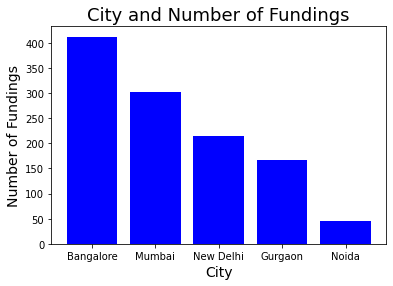

In [17]:
'''
-Can only chose between Bangalore, Mumbai, and NCR{NCR include Gurgaon, Noida and New Delhi}
 1. Bangalore ( change in sheet from bangalore)
 2. Mumbai 
 3. New Delhi(change in sheet from delhi)
 4. Noida
 5. Gurgaon
 
-Find location with the most funding

-About the graph
 bar graph 
 x - location
 y - number of funding 
 
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv("Downloads/startup_funding.csv",encoding='utf-8')
df.dropna(subset=['CityLocation','AmountInUSD'],inplace=True)

def seprateCity(city):
    return city.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(seprateCity)
df['CityLocation'] = df['CityLocation'].replace(['Delhi','bangalore'],['New Delhi','Bangalore'])
df=df[(df['CityLocation']=='Bangalore')|(df['CityLocation']=='Mumbai')|(df['CityLocation']=='Gurgaon')|(df['CityLocation']=='Noida')|(df['CityLocation']=='New Delhi')]
df=df.groupby(by='CityLocation').size()
df.sort_values(ascending=False,inplace=True)

city = df.index
Number_of_fundings=df.values

for i in range(len(city)):
    print(city[i],Number_of_fundings[i])
    
plt.bar(city,Number_of_fundings, color = 'Blue')
plt.title('City and Number of Fundings',fontsize = 18)
plt.xlabel('City', fontsize = 14)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.ylabel('Number of Fundings',fontsize = 14)
plt.show()


Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


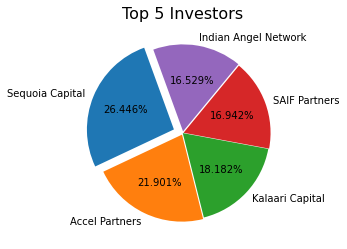

In [36]:
'''
- Find a list of top 5 Investors who invested maximum number of times.
- Consider each investor in a startup
- ignore undisclosed investors
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv("Downloads/startup_funding.csv",encoding = 'utf-8')

df=df.dropna(subset=['InvestorsName'])

df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

investors = df.InvestorsName
investors_name = []

for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())           
dct = {}

for i in investors_name:
    dct[i] = dct.get(i,0) + 1

dct_keys = sorted(dct,key=dct.get,reverse=True)
c=0

Inv_name=[]
count=[]

for i in range(len(dct_keys)):
    print(dct_keys[i],dct[dct_keys[i]])
    Inv_name.append(dct_keys[i])
    count.append(dct[dct_keys[i]])
    c+=1
    if c==5:
        break
        

plt.pie(count,labels=Inv_name,autopct='%0.3f%%',counterclock=False,startangle=110,explode=[0.11,0.02,0.0,0.01,0.02])
plt.title('Top 5 Investors', fontsize = 16)
plt.show()

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


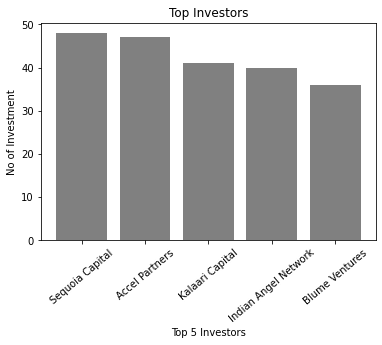

In [49]:
'''
Finding the Investors who have invested in Ola, Flipkart, Oyo and Paytm.

'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Read startup_funding.csv file using pandas
df = pd.read_csv("Downloads/startup_funding.csv",encoding='utf-8')
df.dropna(subset=['StartupName','InvestorsName'])
df['StartupName'].replace(['Oyorooms','OyoRooms','Oyo Rooms','OYO Rooms','Olacabs','Ola Cabs','Olacabs','Flipkart.com','Paytm Marketplace'],['Oyo','Oyo','Oyo','Oyo','Ola','Ola','Ola','Flipkart','Paytm'],inplace=True)
df = df[(df.InvestorsName != 'Undisclosed Investors')]
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)
            
df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)

name = []
count = []

for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count, color = 'grey')
plt.xticks(rotation=40)
plt.xlabel('Top 5 Investors')
plt.ylabel('No of Investment')
plt.title('Top Investors')
plt.show()

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


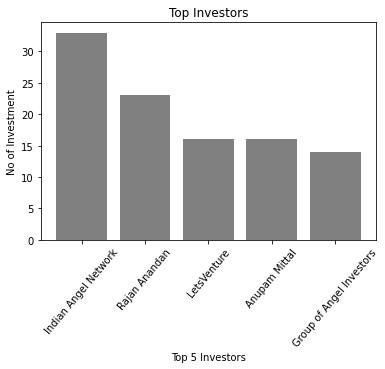

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

df = pd.read_csv("Downloads/startup_funding.csv",encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace(['Oyorooms','OyoRooms','Oyo Rooms','OYO Rooms','Olacabs','Ola Cabs','Olacabs','Flipkart.com','Paytm Marketplace'],['Oyo','Oyo','Oyo','Oyo','Ola','Ola','Ola','Flipkart','Paytm'],inplace=True)


df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df['InvestmentType'].replace(['PrivateEquity','SeedFunding','Crowd funding'],['Private Equity','Seed Funding','Crowd Funding'],inplace=True)

df = df[(df.InvestmentType == 'Crowd Funding') | (df.InvestmentType == 'Seed Funding')]

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count, color = 'grey')
plt.xticks(rotation=50)
plt.xlabel('Top 5 Investors')
plt.ylabel('No of Investment')
plt.title('Top Investors')
plt.show()

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


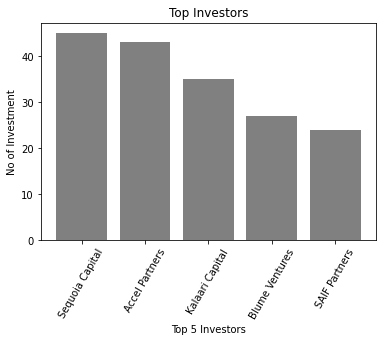

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Downloads/startup_funding.csv",encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace(['Oyorooms','OyoRooms','Oyo Rooms','OYO Rooms','Olacabs','Ola Cabs','Olacabs','Flipkart.com','Paytm Marketplace'],['Oyo','Oyo','Oyo','Oyo','Ola','Ola','Ola','Flipkart','Paytm'],inplace=True)


df = df[df.InvestorsName != 'Undisclosed Investors']
df = df[df.InvestorsName != 'Undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investors']
df = df[df.InvestorsName != 'undisclosed investor']

df['InvestmentType'].replace(['PrivateEquity','SeedFunding','Crowd funding'],['Private Equity','Seed Funding','Crowd Funding'],inplace=True)

df = df[df.InvestmentType == 'Private Equity']

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count,color='grey')
plt.xticks(rotation=60)
plt.xlabel('Top 5 Investors')
plt.ylabel('No of Investment')
plt.title('Top Investors')
plt.show()